In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Customize data folder
data_folder = "C:/Users/Alex H/OneDrive/Documents/BU Fall 2023/DS701/ds-livable-streets-infra/fa23-team/"

In [2]:
# Read combined data
combined_demo_prop = pd.read_csv(data_folder + "combined_demo_prop.csv", index_col=False)

In [3]:
combined_demo_prop.tract = combined_demo_prop.tract.astype(str)

In [4]:
combined_demo_prop.tract = combined_demo_prop.tract.str.replace(r'\.0$', '', regex=True)

In [5]:
# Sort the DataFrame by 'tract' and 'year' to ensure proper order
combined_demo_prop.sort_values(by=['tract', 'year'], inplace=True)

# Calculate the differences with previous 'year' values for each 'tract'
combined_demo_prop['change_black'] = combined_demo_prop.groupby('tract')['race_black'].diff()
combined_demo_prop['change_value'] = combined_demo_prop.groupby('tract')['median_value'].diff()

combined_demo_prop.head(24)

,tract,year,total_population,male,female,median_age,race_white,race_black,race_ai_alaskan,race_asian,race_hawaiian,race_other,race_hispanic,median_value,median_monthly_mort,median_monthly_rent,change_black,change_value
408,1001,2010,5617,0.481,0.519,23.9,0.063,0.638,0.012,0.018,0.0,0.252,0.301,280400.0,2680.0,525.0,NaN,NaN
409,1001,2011,5657,0.480,0.520,24.5,0.109,0.619,0.014,0.003,0.0,0.245,0.365,276900.0,2823.0,474.0,-0.019,-3500.0
410,1001,2012,6189,0.451,0.549,25.2,0.074,0.701,0.004,0.015,0.0,0.186,0.287,268000.0,2561.0,510.0,0.082,-8900.0
411,1001,2013,6295,0.433,0.567,27.3,0.112,0.727,0.001,0.011,0.0,0.119,0.266,261700.0,2155.0,538.0,0.026,-6300.0
412,1001,2014,6371,0.455,0.545,31.2,0.131,0.750,0.001,0.018,0.0,0.076,0.259,279300.0,1908.0,538.0,0.023,17600.0
413,1001,2015,6146,0.436,0.564,32.9,0.169,0.750,0.001,0.018,0.0,0.034,0.267,274700.0,1978.0,686.0,0.000,-4600.0
414,1001,2016,6072,0.413,0.587,33.3,0.146,0.772,0.000,0.007,0.0,0.033,0.274,290100.0,1867.0,666.0,0.022,15400.0
415,1001,2017,6742,0.412,0.588,30.7,0.147,0.787,0.002,0.007,0.0,0.013,0.236,326300.0,2124.0,924.0,0.015,36200.0
416,1001,2018,7140,0.410,0.590,30.6,0.123,0.779,0.002,0.006,0.0,0.031,0.266,366700.0,2216.0,947.0,-0.008,40400.0
417,1001,2019,7013,0.415,0.585,29.8,0.102,0.789,0.003,0.013,0.0,0.040,0.253,319100.0,1906.0,1134.0,0.010,-47600.0


In [6]:
change_sorted = combined_demo_prop.sort_values(by='change_black', ascending=False)
change_sorted.head(10)

,tract,year,total_population,male,female,median_age,race_white,race_black,race_ai_alaskan,race_asian,race_hawaiian,race_other,race_hispanic,median_value,median_monthly_mort,median_monthly_rent,change_black,change_value
373,922,2011,2870,0.549,0.451,38.9,0.262,0.469,0.016,0.068,0.000,0.172,0.195,465500.0,2561.0,1184.0,0.137,-700.0
161,902,2015,2383,0.507,0.493,30.4,0.084,0.470,0.000,0.046,0.011,0.329,0.374,423200.0,1973.0,792.0,0.116,32300.0
474,1006.01,2016,5626,0.445,0.555,34.1,0.334,0.438,0.000,0.116,0.000,0.050,0.084,275500.0,2039.0,1336.0,0.105,9100.0
172,903,2014,3648,0.375,0.625,29.1,0.049,0.656,0.069,0.000,0.000,0.200,0.270,336100.0,1759.0,697.0,0.102,19900.0
122,820,2012,2865,0.451,0.549,40.0,0.061,0.873,0.000,0.011,0.000,0.041,0.098,336200.0,2671.0,876.0,0.093,-45500.0
314,917,2012,3330,0.462,0.538,28.8,0.094,0.533,0.001,0.007,0.000,0.330,0.319,300500.0,2125.0,1360.0,0.091,-16800.0
321,917,2019,3267,0.444,0.556,31.4,0.085,0.666,0.003,0.091,0.000,0.107,0.181,449200.0,1984.0,1467.0,0.089,4800.0
303,916,2013,3358,0.492,0.508,30.8,0.156,0.489,0.000,0.205,0.000,0.130,0.158,346800.0,1994.0,1181.0,0.087,34300.0
331,918,2017,3631,0.464,0.536,33.1,0.043,0.687,0.000,0.001,0.000,0.181,0.064,365400.0,2145.0,1184.0,0.085,10400.0
230,910.01,2012,2811,0.514,0.486,36.4,0.525,0.156,0.000,0.269,0.000,0.041,0.025,307600.0,1836.0,1057.0,0.085,-28000.0


<AxesSubplot: >

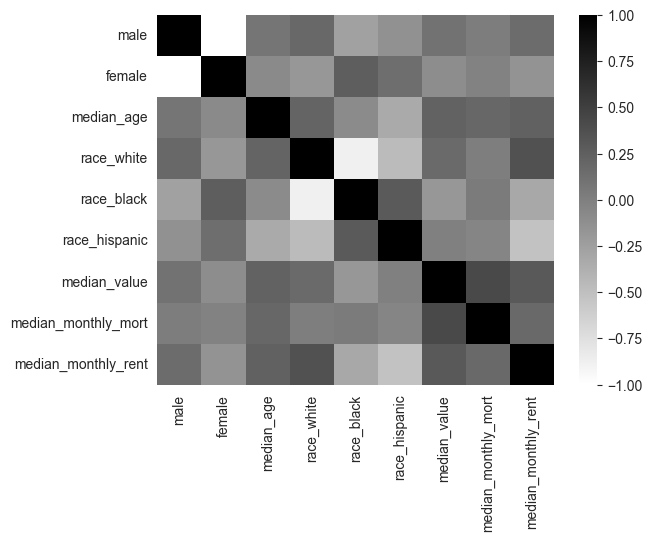

In [7]:
demo_prop_corr = combined_demo_prop[['male', 'female', 'median_age', 'race_white', 'race_black',
                                     'race_hispanic', 'median_value', 'median_monthly_mort',
                                     'median_monthly_rent']].corr()

sns.heatmap(demo_prop_corr, cmap="binary")

In [19]:
import openpyxl

demo_prop_corr.style.background_gradient(cmap="RdBu").format(precision=2)\
    .to_excel("style.xlsx")

# Generate graphs

In [131]:
eleven = combined_demo_prop[combined_demo_prop['year'] == 2011][['tract', 'change_black']]
twelve = combined_demo_prop[combined_demo_prop['year'] == 2012][['tract', 'change_black']]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, '1001'),
  Text(1, 0, '1002'),
  Text(2, 0, '1003'),
  Text(3, 0, '1004'),
  Text(4, 0, '1005'),
  Text(5, 0, '1006.01'),
  Text(6, 0, '1006.03'),
  Text(7, 0, '1007'),
  Text(8, 0, '1008'),
  Text(9, 0, '1101.03'),
  Text(10, 0, '1201.04'),
  Text(11, 0, '1202.01'),
  Text(12, 0, '801'),
  Text(13, 0, '803'),
  Text(14, 0, '804.01'),
  Text(15, 0, '805'),
  Text(16, 0, '806.01'),
  Text(17, 0, '813'),
  Text(18, 0, '814'),
  Text(19, 0, '815'),
  Text(20, 0, '817'),
  Text(21, 0, '818'),
  Text(22, 0, '819'),
  Text(23, 0, '820'),
  Text(24, 0, '821'),
  Text(25, 0, '901'),
  Text(26, 0, '902'),
  Text(27, 0, '903'),
  Text(28, 0, '904'),
  Text(29, 0, '906'),
  Text(30, 0, '907'),
  Text(31, 0, '909.01'

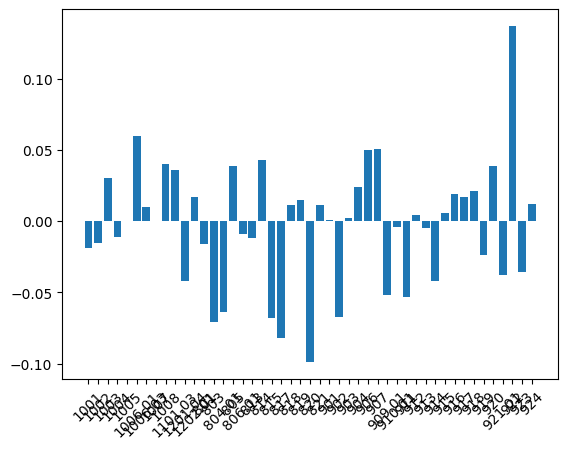

In [138]:
import matplotlib.pyplot as plt

plt.bar(eleven.tract, eleven.change_black)
plt.xticks(rotation=45)